In [4]:
#Import the request library.
import requests
#Import the dependendcies
import pandas as pd
import matplotlib as plt
import numpy as np
#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
from citipy import citipy

#Import the API key.
from config import weather_api_key


In [5]:
# Build query URL

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key 
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=bbc4a8462878514ff81e8c3a45744367


In [6]:
# Create a set of randon lat and lon comination.
lats =np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high= 18.000, size=1500)
lat_lngs = zip(lats, lngs)

In [7]:
#Create a list for holding the cities.
cities=[]

#Identify the nearest city for each latitude and longitude combinations
for lat_lngs in lat_lngs:
    city = citipy.nearest_city(lat_lngs[0], lat_lngs[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

429

In [8]:
city_url= url + "&q=" + cities[0].replace(" ","+")

city_weather =requests.get(city_url).json()

city_weather

{'coord': {'lon': -25.6667, 'lat': 37.7333},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 59.72,
  'feels_like': 59.25,
  'temp_min': 59.72,
  'temp_max': 59.72,
  'pressure': 1001,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 70},
 'clouds': {'all': 40},
 'dt': 1648326939,
 'sys': {'type': 1,
  'id': 6899,
  'country': 'PT',
  'sunrise': 1648280233,
  'sunset': 1648324760},
 'timezone': -3600,
 'id': 3372783,
 'name': 'Ponta Delgada',
 'cod': 200}

In [9]:
#Create an empty list to hold the weather data.
city_data=[]

#Print the begining of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

#Create counter.
record_count =1
set_count =1

           
#Loop through all the cities in our list.
for i, city in enumerate(cities):

    
    #group cities in sets of 59 for loggin purposes.
    if(i % 50 == 0 and i >= 50):
        set_count +=1
        record_count =1
        time.sleep(60)
        
    #create endpoint URL with each cities.
    city_url = url + "&q=" + city.replace(" ","+")
       
    #Log the url, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count +=1

#Run an API request for each of the cities.
    try:
        #parse the JSON and retrieve data.
        city_weather =requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat =city_weather["coord"]["lat"]
        city_lng =city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard.
        city_date =datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date" : city_date})
#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the Data Loading is complete.
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

                                        

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | ponta delgada
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | magnolia
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | botwood
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | saint-georges
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | lima
Processing Record 19 of Set 1 | summerville
Processing Record 20 of Set 1 | lake havasu city
Processing Record 21 of Set 1 | columbus
Processing Record 22 of Set 1 | inirida
Processing Record 23 of Set 1 | lompoc
Proc

Processing Record 38 of Set 4 | sorvag
City not found. Skipping...
Processing Record 39 of Set 4 | timra
Processing Record 40 of Set 4 | chalmette
Processing Record 41 of Set 4 | fairhope
Processing Record 42 of Set 4 | rocha
Processing Record 43 of Set 4 | wilmington
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | ouargaye
Processing Record 46 of Set 4 | nanakuli
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | santa maria
Processing Record 49 of Set 4 | tiarei
Processing Record 50 of Set 4 | general roca
Processing Record 1 of Set 5 | dakar
Processing Record 2 of Set 5 | riberalta
Processing Record 3 of Set 5 | freeport
Processing Record 4 of Set 5 | cariati
Processing Record 5 of Set 5 | dauphin
Processing Record 6 of Set 5 | smithers
Processing Record 7 of Set 5 | miles city
Processing Record 8 of Set 5 | desaguadero
Processing Record 9 of Set 5 | norman wells
Processing Record 10 of Set 5 | lavrentiya
Processing Record 1

Processing Record 29 of Set 8 | isabela
Processing Record 30 of Set 8 | carmo do rio claro
Processing Record 31 of Set 8 | concepcion del oro
Processing Record 32 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 33 of Set 8 | dawson creek
Processing Record 34 of Set 8 | panama city
Processing Record 35 of Set 8 | conceicao do araguaia
Processing Record 36 of Set 8 | johnson city
Processing Record 37 of Set 8 | pajapan
Processing Record 38 of Set 8 | killybegs
Processing Record 39 of Set 8 | agadez
Processing Record 40 of Set 8 | limoux
Processing Record 41 of Set 8 | tanout
Processing Record 42 of Set 8 | ashland
Processing Record 43 of Set 8 | carbonia
Processing Record 44 of Set 8 | san quintin
Processing Record 45 of Set 8 | uige
Processing Record 46 of Set 8 | constantine
Processing Record 47 of Set 8 | nioro
Processing Record 48 of Set 8 | champerico
Processing Record 49 of Set 8 | stornoway
Processing Record 50 of Set 8 | steinbach
Processing Record 1 of Set 9 

In [10]:
len(city_data)

402

In [11]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind Speed,Country,Date
0,Ponta Delgada,37.7333,-25.6667,59.72,82,40,8.05,PT,2022-03-26 20:35:39
1,Provideniya,64.3833,-173.3000,18.64,89,100,1.03,RU,2022-03-26 20:36:54
2,Magnolia,33.2671,-93.2393,71.29,36,57,3.62,US,2022-03-26 20:38:43
3,Upernavik,72.7868,-56.1549,12.79,92,100,5.84,GL,2022-03-26 20:38:44
4,Saldanha,-33.0117,17.9442,68.05,82,65,6.51,ZA,2022-03-26 20:38:45
5,Botwood,49.1499,-55.3482,37.90,100,100,2.82,CA,2022-03-26 20:38:45
6,Torbay,47.6666,-52.7314,40.28,94,100,10.36,CA,2022-03-26 20:35:34
7,Qaanaaq,77.4840,-69.3632,0.50,93,99,3.89,GL,2022-03-26 20:38:46
8,Hilo,19.7297,-155.0900,78.53,69,100,6.91,US,2022-03-26 20:38:47
9,Chuy,-33.6971,-53.4616,69.82,66,61,13.65,UY,2022-03-26 20:34:11


In [12]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudness,Wind Speed
0,Ponta Delgada,PT,2022-03-26 20:35:39,37.7333,-25.6667,59.72,82,40,8.05
1,Provideniya,RU,2022-03-26 20:36:54,64.3833,-173.3000,18.64,89,100,1.03
2,Magnolia,US,2022-03-26 20:38:43,33.2671,-93.2393,71.29,36,57,3.62
3,Upernavik,GL,2022-03-26 20:38:44,72.7868,-56.1549,12.79,92,100,5.84
4,Saldanha,ZA,2022-03-26 20:38:45,-33.0117,17.9442,68.05,82,65,6.51
...,...,...,...,...,...,...,...,...,...
397,San Ramon,US,2022-03-26 20:51:20,37.7799,-121.9780,77.22,53,0,9.22
398,Ahome,MX,2022-03-26 20:51:21,25.9167,-109.1833,86.05,20,100,11.48
399,Numaran,MX,2022-03-26 20:51:21,20.2500,-101.9333,87.75,9,1,3.13
400,Pochutla,MX,2022-03-26 20:51:22,15.7432,-96.4661,89.82,48,97,8.28


In [15]:
#Create the output file(CS).
output_data_file ="weather_data/cities.csv"
#Export the city_Data into a csv.
city_data_df.to_csv(output_data_file, index_label= "City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1648327884.2973504

In [18]:
import matplotlib.pyplot as plt

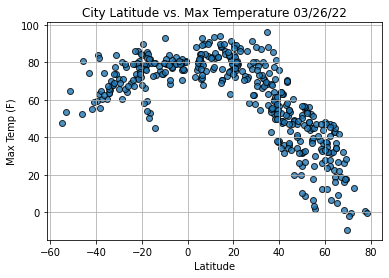

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

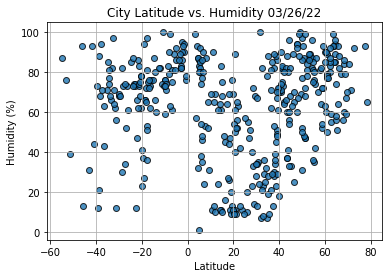

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

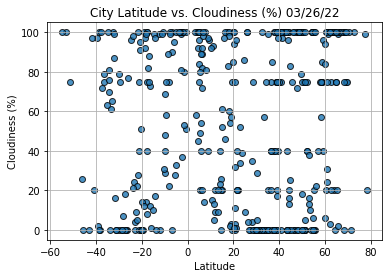

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

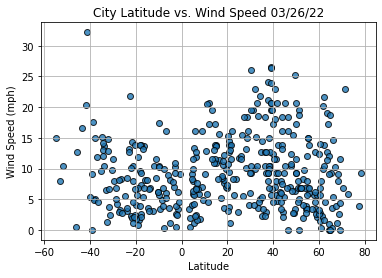

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [25]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2022-03-26 20:38:50
Lat                        62.456
Lng                     -114.3525
Max Temp                     6.42
Humidity                       55
Cloudness                      75
Wind Speed                   13.8
Name: 13, dtype: object

In [26]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0


0       True
1       True
2       True
3       True
4      False
       ...  
397     True
398     True
399     True
400     True
401     True
Name: Lat, Length: 402, dtype: bool

In [27]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudness,Wind Speed
0,Ponta Delgada,PT,2022-03-26 20:35:39,37.7333,-25.6667,59.72,82,40,8.05
1,Provideniya,RU,2022-03-26 20:36:54,64.3833,-173.3000,18.64,89,100,1.03
2,Magnolia,US,2022-03-26 20:38:43,33.2671,-93.2393,71.29,36,57,3.62
3,Upernavik,GL,2022-03-26 20:38:44,72.7868,-56.1549,12.79,92,100,5.84
5,Botwood,CA,2022-03-26 20:38:45,49.1499,-55.3482,37.90,100,100,2.82


In [28]:
 # Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

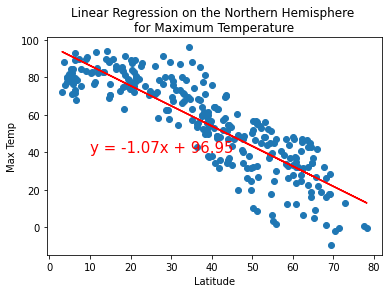

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

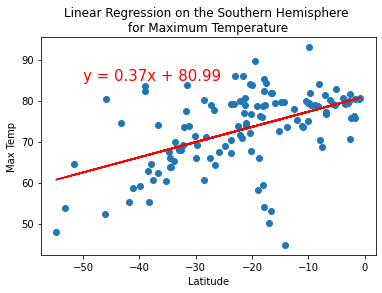

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

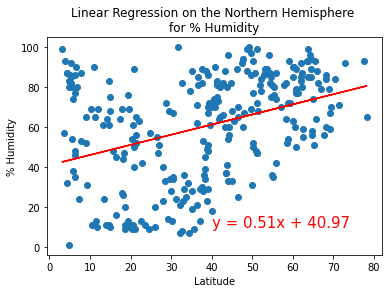

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

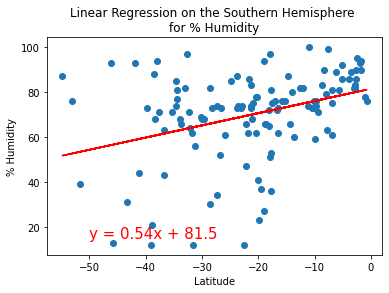

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

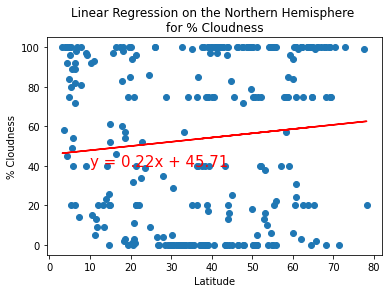

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudness', '% Cloudness',(10,40))

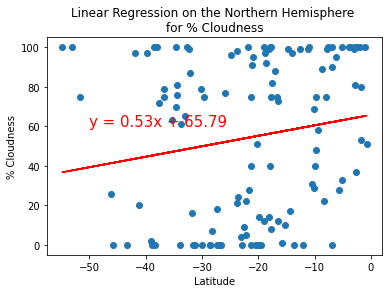

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudness', '% Cloudness',(-50,60))

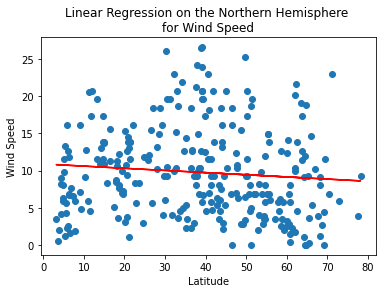

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

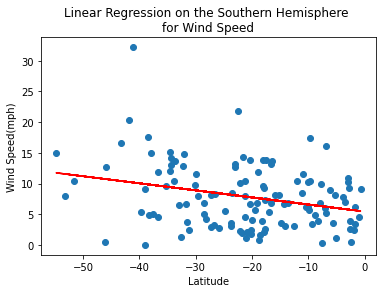

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))